# Wstęp do Uczenia Maszynowego - Lab 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed = 42

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [3]:
y = np.array(data['chd'])
X = data.drop(['chd'],axis=1)

In [4]:
map_dict = {'Present': 1, 'Absent':0}
X['famhist'] = X['famhist'].map(map_dict)
X.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49


## Naiwny Klasyfikator Bayesowski
Jest oparty na założeniu o wzajemnej niezależności zmiennych. Często nie mają one żadnego związku z rzeczywistością i właśnie z tego powodu nazywa się je naiwnymi.

In [5]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X,y)
y_hat = nb.predict(X)
print('y:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y[0:10]))

y:     [1 0 0 1 1 1 0 0 0 1]
y_hat: [1 1 0 1 1 0 0 1 0 1]


- Jakie widzicie wady/zalety tego algorytmu?

## Sposoby podziału danych
- Jak radzić sobie z overfitingiem?
- Jakie znacie sposoby podziału danych na treningowe i testowe?

### Zbiór treningowy i testowy
Prosty podział danych na część, na której uczymy model i na część która służy nam do sprawdzenia jego skuteczności.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
print(X.shape,X_train.shape,X_test.shape)

(462, 9) (369, 9) (93, 9)


**Szybkie zadanie:** Podzielić dane w taki sposób jak powyżej i nauczyć na zbiorze treningowym regresje logistyczną

- Jakie widzicie wady podejścia train/test split?

### Crossvalidation
- Czy możemy stosować CV dzieląc zbiór, tak by w zbiorze walidacyjnym pozostała tylko jedna obserwacja danych?
- Czy sprawdzając performance modelu przez CV, możemy potem nauczyć model na całym zbiorze danych?
- Czy dobierając parametry do modelu, powinniśmy wydzielić dodatkowy zbiór testowy, a CV przeprowadzać tylko na części treningowej?

In [8]:
from sklearn.model_selection import cross_val_score
cross_val_score(nb, X, y, scoring='accuracy', cv = 10)

array([0.70212766, 0.68085106, 0.7173913 , 0.69565217, 0.69565217,
       0.73913043, 0.69565217, 0.69565217, 0.73913043, 0.73913043])

## Miary ocen jakości klasyfikatorów
- Jakie znacie miary oceny klasyfikatorów?

Na potrzeby zadania wygenerujmy sobie wynik:

In [9]:
nb.fit(X_train,y_train)
y_hat = nb.predict(X_test)
print("y_test: "+ str(y_test) + "\n\ny_hat:  " + str(y_hat))

y_test: [0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0]

y_hat:  [0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1
 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0
 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0]


### Accuracy
$ACC = \frac{TP+TN}{ALL}$

Bardzo intuicyjna miara - ile obserwacji zakwalifikowaliśmy poprawnie.

- Jaki jest problem z accuracy?

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat)

0.7526881720430108

### Precision & Recall
**Precision** mówi o tym jak dokładny jest model wśród pozytywnej klasy, ile z przewidzianych jest faktycznie pozytywnych.

$PREC = \frac{TP}{TP+FP}= \frac{TP}{\text{TOTAL PREDICTED POSITIVE}}$

- Jakie widzicie zastosowania takiej miary?

**Recall** mówi ile było poprawnych klasyfikacji dla pozytywnej klasy.

$RECALL = \frac{TP}{TP+FN} = \frac{TP}{\text{TOTAL ACTUAL POSITIVE}}$
- Jakie widzicie zastosowania takiej miary?


In [11]:
from sklearn.metrics import precision_score
precision_score(y_test, y_hat)

from sklearn.metrics import recall_score
recall_score(y_test, y_hat)

0.7647058823529411

### F1 Score
Szukanie balansu pomiędzy PRECISION i RECALL:

$F1 = 2\frac{PREC * RECALL}{PREC + RECALL}$

In [12]:
from sklearn.metrics import f1_score
f1_score(y_test, y_hat)

0.6933333333333332

### ROC AUC
Receiver Operating Characterictic (ROC), lub po prostu krzywa ROC, to wykres, który ilustruje efektywność binarnego klasyfikatora, niezależnie od progu dyskryminacyjnego. Na osi Y jest TPR, czyli RECALL, na osi X jest FPR, czyli $1 - SPECIFITY$.

$FPR = 1- SPECIFITY = 1 - \frac{TN}{TN+FP}$

SPECIFITY - przykład: odsetek zdrowych osób, które są prawidłowo zidentyfikowane jako nie cierpiące na chorobę.

In [13]:
y_hat_proba = nb.predict_proba(X_test)[:,1]

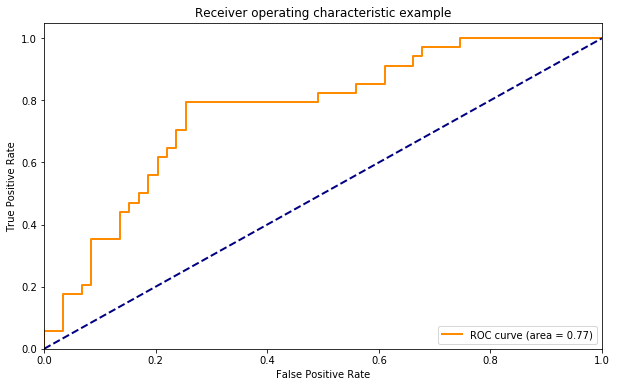

In [14]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, y_hat_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

- Jaką widzicie przewagę tej miary nad poprzednimi?

In [15]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_hat_proba)

0.7662013958125623

## Ensemble Methods
Na potrzeby stosowania różnych metod Ensemble Learningu załadujemy sobie już 3 modele z których będziemy potem korzystać.

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

model1 = DecisionTreeClassifier(random_state=1)
model2 = KNeighborsClassifier()
model3 = LogisticRegression(random_state=1, max_iter=1000)
estimators=[('DecisionTree', model1), ('KNN', model2), ('LR', model2)]

### Max Voting

In [57]:
from sklearn.ensemble import VotingClassifier

In [58]:
model = VotingClassifier(estimators=estimators, voting='hard')
model.fit(X_train,y_train)

y_hat = model.predict(X_test)
accuracy_score(y_test, y_hat), model.score(X_test,y_test)

(0.6559139784946236, 0.6559139784946236)

### Averaging

In [59]:
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

pred1=model1.predict_proba(X_test)
pred2=model2.predict_proba(X_test)
pred3=model3.predict_proba(X_test)

# Average
pred_average=(pred1+pred2+pred3)/3
y_hat = np.argmax(pred_average, axis=1)
print(accuracy_score(y_test, y_hat))

# Weighted Average
pred_weighted_average=(pred1*0.05+pred2*0.05+pred3*0.9)
y_hat = np.argmax(pred_weighted_average, axis=1)
print(accuracy_score(y_test, y_hat))

0.6236559139784946
0.7419354838709677


### Stacking

In [61]:
from sklearn.ensemble import StackingClassifier

In [62]:
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
from sklearn.model_selection import train_test_split
clf.fit(X_train, y_train).score(X_test, y_test)

0.6129032258064516

#### Czy zestackowanie kilku takich samych modeli zwiększy ich dokładność?
- Jeżeli tak to podaj przykład?
- Jeżeli nie to czy masz jakiś pomysł żeby ulepszyć tą metodę?

### Bagging (Bootstrap Aggregating)
Bootstrap - to technika próbkowania, w której tworzymy podzbiory (próby) obserwacji z oryginalnego datasetu, **ze zwracaniem**. Rozmiar podzbiorów jest taki sam jak rozmiar oryginalnego datasetu.

1. Losujemy N **bootstrapowych** prób ze zbioru treningowego
2. Trenujemy niezależnie N "słabych" klasyfikatorów
3. Składamy wyniki "słabych" modeli 
    - **Klasyfikacja:** reguła większościowa / uśrednione prawdopodobieństwo
    - **Regresja:** Uśrednione wartości

In [63]:
from sklearn.ensemble import BaggingClassifier

In [70]:
clf = BaggingClassifier(base_estimator=model1,
                        n_estimators=10, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.6559139784946236

#### Jakie widzicie wady i zalety takiej metody?

#### Random Forest
Najbardziej popularny algorytm Baggingowy.

Cechy:
- podstawowym algorytmem jest Drzewo Decyzyjne (wszystkie zalety drzew: obsługa NA)
- Do podziału każdego węzła wykorzystujemy losowe zmienne (ilość można wybrać jako hiperparametr)
- wbudowana metoda istotności zmiennych

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
model_rf = RandomForestClassifier(n_estimators=1000, # Ilość słabych estymatorów
                                  max_depth=2, # Maksymalna wysokość drzewa w słabym estymatorze
                                  min_samples_split = 2, # Minimalna ilość obserwacji wymagana do podziału węzła
                                  max_features = 3, # Maksymalna ilość zmiennych brana pod uwagę przy podziale węzła
                                  random_state=0,
                                  n_jobs = -1)
model_rf.fit(X_train, y_train)
model_rf.score(X_test,y_test)

0.7204301075268817

### Boosting
Boosting działa podobnie jak Bagging z jedną różnicą. Każda kolejna próba bootstrap jest tworzona w taki sposób, że losuje z większym prawdopodobieństwiem obserwacje **źle sklasyfikowane**. W skrócie: Boosting uczy się na błędach, które popełnił w poprzednich iteracjach.

#### AdaBoost
Najprostsza metoda boostingowa

In [80]:
from sklearn.ensemble import AdaBoostClassifier

In [81]:
model = AdaBoostClassifier(random_state=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.7204301075268817

#### Gradient Boosting
Każdy nowy "słaby" model jest uczony na błędach poprzednich.

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

In [83]:
model= GradientBoostingClassifier(random_state=1,
                                  learning_rate=0.01)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.7204301075268817

#### XGBoost
Zaawansowana implementacja Gradient Boostingu

In [86]:
from xgboost import XGBClassifier # Inna paczka niż sklearn!

In [107]:
model=XGBClassifier(random_state=1,
                    learning_rate=0.01, # Szybkość "uczenia" się
                    booster='gbtree', # Jaki model wykorzystujemy (drzewo - gbtree, liniowe - gblinear)
                    nround = 100, # Ilość itereacji boosingowych
                    max_depth=4 # Maksymalna głębokość drzewa 
                    )
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.7526881720430108